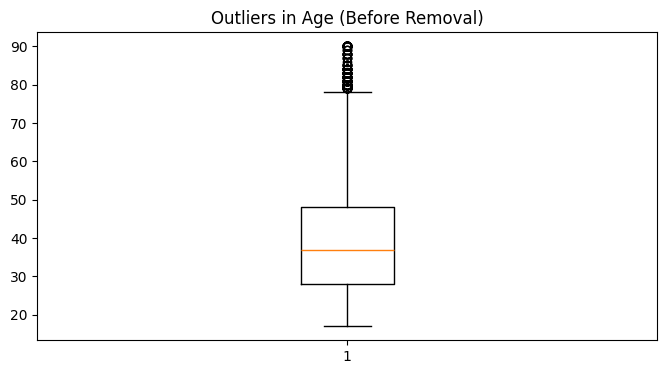

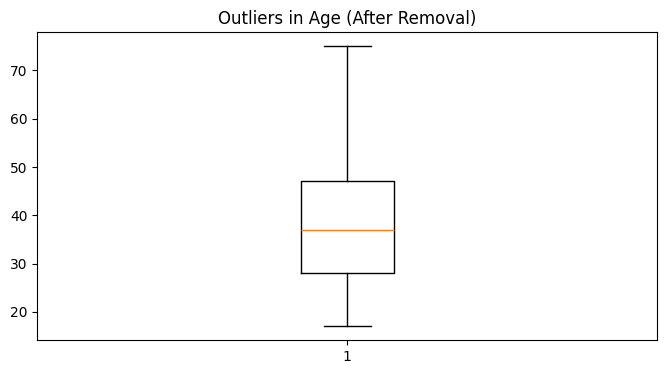

Fitting 3 folds for each of 1 candidates, totalling 3 fits

 Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
🔍 Accuracy: 87.83%
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      7206
           1       0.79      0.68      0.73      2318

    accuracy                           0.88      9524
   macro avg       0.85      0.81      0.83      9524
weighted avg       0.87      0.88      0.87      9524



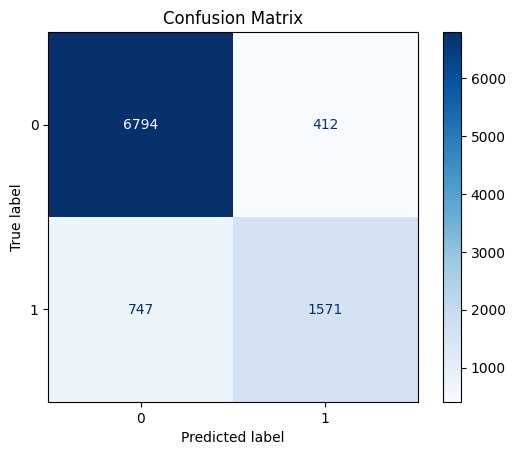

Model and scaler saved as 'employee_salary_prediction.pkl' and 'scaler.pkl'


In [16]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
import joblib
import warnings
warnings.filterwarnings('ignore')

# 1 Load Data
data = pd.read_csv("/content/adult 3.csv")

# 2 Clean & Preprocess
data['occupation'].replace({'?': 'others'}, inplace=True)
data['workclass'].replace({'?': 'notlisted'}, inplace=True)
data = data[~data['workclass'].isin(['Without-pay', 'Never-worked'])]
data = data[~data['education'].isin(['5th-6th', '1st-4th', 'Preschool'])]

# Drop columns
data.drop(columns=['education', 'fnlwgt'], inplace=True)

# Outlier Plot Before
plt.figure(figsize=(8,4))
plt.boxplot(data['age'])
plt.title("Outliers in Age (Before Removal)")
plt.show()

# Remove age outliers
data = data[(data['age'] >= 17) & (data['age'] <= 75)]

# Outlier Plot After
plt.figure(figsize=(8,4))
plt.boxplot(data['age'])
plt.title("Outliers in Age (After Removal)")
plt.show()

# Label Encoding
encoder = LabelEncoder()
for col in ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']:
    data[col] = encoder.fit_transform(data[col].astype(str))

# 3 Feature-Target Split
X = data.drop(columns=['income'])
y = data['income']

# 4 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 5 Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6 Train Gradient Boosting Model
param_grid = {
    'n_estimators': [200],
    'learning_rate': [0.1],
    'max_depth': [5]
}
gb = GradientBoostingClassifier(random_state=42)
grid = GridSearchCV(gb, param_grid, cv=3, scoring='f1', verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

# 7 Best Model
best_model = grid.best_estimator_

# 8 Predict & Evaluate
y_pred = best_model.predict(X_test)

print("\n Best Parameters:", grid.best_params_)
print(f"🔍 Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))

# 9 Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# 10 Save Model
joblib.dump(best_model, "employee_salary_prediction.pkl")
joblib.dump(scaler, "scaler.pkl")
print("Model and scaler saved as 'employee_salary_prediction.pkl' and 'scaler.pkl'")
